# MTH437LRF

# Intro numeric analysis 	– Multistep methods

##    Team PI
    -Anjali Sarma –50441491
    -Sahithi Dodda -50441731
    -Ranga Sai Saran Rohit Tananki - 50441793
    -Siddhant Gupta -  50441839 

## Multistep Methods

    -Linear multistep methods are used for the numerical solution of ordinary differential equations.
    -Single-step methods (such as Euler's method) refer to only one previous point and its derivative to determine the current value.
    -Multistep methods attempt to gain efficiency by keeping and using the information from previous steps rather than discarding it. 
    -Multistep methods refer to several previous points and derivative values. 


## Types of Multistep Methods

    -Three families of linear multistep methods are commonly used: Adams–Bashforth methods, Adams–Moulton methods, and the Predictor-corrector.
    -Out of which there are two types of Adams methods, the explicit and the implicit types. The explicit type is called theAdams-Bashforth (AB) methods and the implicit type is called the Adams-Moulton (AM) methods
    -Adams methods are based on the idea of approximating the integrand with a polynomial within the interval (tn, tn+1).Using  a kth order polynomial results in a k+1th order method

## Adams–Bashforth method

The Adams – Bashforth methods with s = 1, 2, 3, 4, 5 are


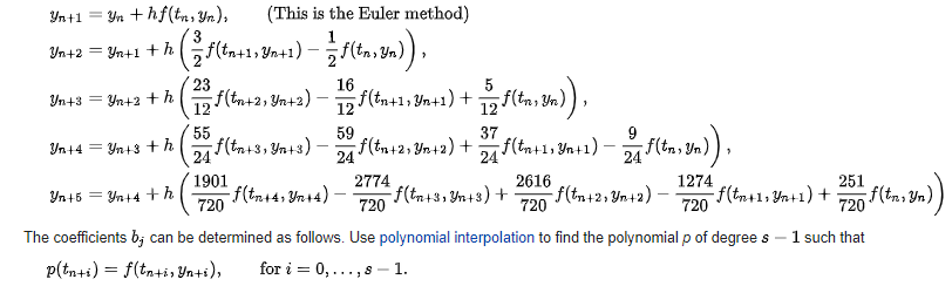

## Adams–Moulton method

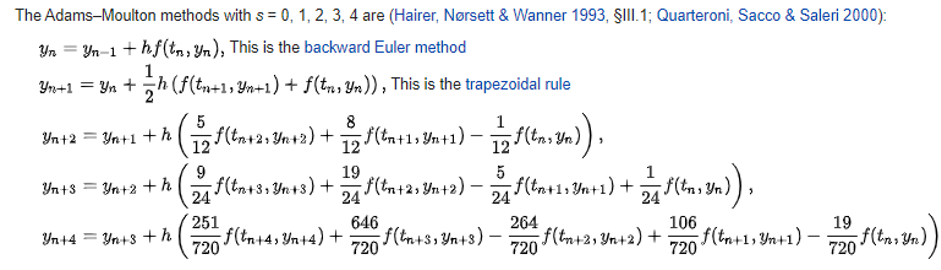

## Applications of Adams Methods

    -For explicitly computing the approximate solution at an instant time from the solutions in previous instants.
    -Differential equations solved on a computer
        (Ex: For calculating trajectory of a projectile.)
    -To solve differential Riccati equations which play fundamental role in control theory, 
        (Ex: optimal control, filtering and estimation, decoupling and order reduction, etc…)
  - __Adams-Bashforth - predictor__   
  - __Adams-Moulton  - corrector__    

## Inference of Multistep Methods

    -High-order method is used to achieve high accuracy. The Runge-Kutta-Feldberg method is popular because it is high order        and does not require a starting method (as does an Adams-Bashforth method). 
    -For problems in which the function evaluations are a significant portion of the calculation time this might be important.

## Comparison

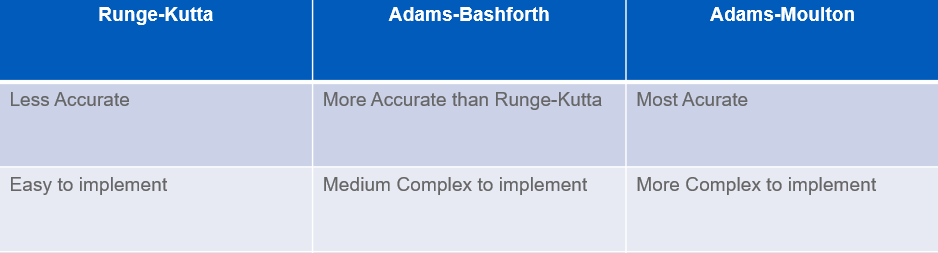

## Code : 

we worked with numpy , took reference from codes previously used for other assignments of numerical analysis and few online sites . Four of us worked on the code and the presentation . 

Steps followed : 
- defined the input function 
- defined eulers method to understand single step methods 
- defined Runge Kutta method to use for single step method 
- defined Adams-Bashforth 
- two step 
- three step 
- four step 
- five step 
- Defined Predictor collector method 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# differential function given 
def func(t , y):
    return (y / t) + 1

# actual values of the original function 
def f(t):
    return t * (np.log(t) + 2)

# storing all values into a series 
y = []
t = []
for i in range(0,6):
    t.append(1 + i * 0.2)
    y.append(f(1 + i * 0.2)) 
s1 = pd.Series(y,t)

In [3]:
### Eulers method
def euler(f , a, b, N , alpha):
    h = (b - a) / N   # step size
    t_input = [] 
    w_output = []
    t = a 
    w = alpha 
    for i in range(1 , N+2):
        t_input.append(t)
        w_output.append(w)
        w = w + h * f(t,w)  # iteration value
        t = a + i * h # next input value
    s2 = pd.Series(w_output , t_input)
    return s2 #dictionary of final values 

In [4]:
# callng the function
euler(func , 1 , 2 ,5 ,2 )

1.0    2.000000
1.2    2.600000
1.4    3.233333
1.6    3.895238
1.8    4.582143
2.0    5.291270
dtype: float64

In [5]:
# error of eulers method 
E1 = abs(s1-euler(func , 1 , 2 ,5 ,2 ))

In [6]:
# RK method  
def RK(f , t0 , tn , y0 , n):
    h = abs((t0 - tn) / n) # step size
    y = np.zeros(n+1) # initializing an array of zero's
    y[0] = y0 # replacing values 
    x  = np.linspace(t0, tn , n+1) # array of input values 
    for idx in range(0,n):
        k1 = h * f(x[idx] , y[idx])
        k2 = h * f(x[idx] + (h/2) , y[idx] + (k1/2))
        k3 = h * f(x[idx] + (h/2) , y[idx] + (k2/2))
        k4 = h * f(x[idx] + h , y[idx] + k3)
        y[idx + 1] = y[idx] + (k1 + 2 * k2 + 3 * k3 + k4) / 6 # iteration value
    s = pd.Series(list(y) , x)
    return s # dictionary of final values



In [7]:
# calling the function
RK(func , 1 , 2  ,2 ,5)

1.0    2.000000
1.2    2.722084
1.4    3.503281
1.6    4.336513
1.8    5.216338
2.0    6.138431
dtype: float64

In [8]:
# error of RK 
E2 = abs(s1 - RK(func , 1 , 2  ,2 ,5))

In [9]:
# Adams-Bashforth two-step explicit method
def AB_2e(f , t0 , tn , y0, y1 , n):
    h = abs(t0 - tn) / n  # step size
    y = np.zeros(n+1) # initializing an array of zero's
    y[0] = y0 # replacing values
    y[1] = y1
    x  = np.linspace(t0, tn , n+1) # array of input values 
    for idx in range(1,n):
        y[idx+1] = y[idx] +((3 * f(x[idx] , y[idx])) - f(x[idx - 1] , y[idx -1])) * h / 2
    s = pd.Series(y , x)# iteration value
    return s # dictionary of final values

In [10]:
AB_2e(func , 1 , 2, 2, 2.722084 , 5)

1.0    2.000000
1.2    2.722084
1.4    3.402605
1.6    4.104894
1.8    4.831519
2.0    5.580216
dtype: float64

In [11]:
# error of AB_2e 
E3 = abs(s1-AB_2e(func , 1 , 2, 2, 2.722084 , 5))

In [12]:
# Adams-Bashforth Three-Step Explicit Method
def AB_3e(f , t0 , tn , y0 , y1 , y2 , n):
    h = abs(t0 - tn) / n # step size
    y = np.zeros(n + 1) # initializing an array of zero's
    y[0] = y0# replacing values
    y[1] = y1
    y[2] = y2
    x = np.linspace(t0 , tn , n+1) # array of input values
    for idx in range(2,n):
        # iteration value
        y[idx+1] = y[idx] + (23 * f(x[idx] , y[idx]) - 16 * f(x[idx-1] , y[idx-1]) + 5 * f(x[idx - 2] , y[idx-2])) * h / 12
    s = pd.Series(y,x)
    return s # dictionary of final values


In [13]:
# calling the function 
AB_3e(func , 1 , 2, 2, 2.722084 , 3.402605 , 5)

1.0    2.000000
1.2    2.722084
1.4    3.402605
1.6    4.096030
1.8    4.818289
2.0    5.564270
dtype: float64

In [14]:
# error of AB_3e 
E4 = abs(s1 - AB_3e(func , 1 , 2, 2, 2.722084 , 3.402605 , 5))

In [15]:
# Adams-Bashforth four-Step Explicit Method
def Adam_B4(func , a, b, N , alpha):
    h = abs(b - a) / N  # step size 
    t = [] 
    w = []
    t.append(a)
    w.append(alpha)
    for i in range(1,4): # value similar to RK 
        k1 = h * func(t[i - 1] ,w[i - 1])
        k2 = h * func(t[i - 1]+(h / 2) , (w[i - 1] + (k1 / 2)))
        k3 = h * func(t[i - 1]+(h / 2) , (w[i - 1] + (k2 / 2)))
        k4 = h * func((t[i - 1] + h) ,(w[i - 1] + k3))
        w.append(w[i - 1] + ((k1 + 2 * k2 + 2 * k3 + k4) / 6)) 
        t.append((a + i * h))
    for i in range(4,N + 1):
        T = a + i * h # input values
        # iteration values
        W = (w[i - 1] + h * (( 55 * func(t[i - 1] , w[i - 1]) - 
                              59 * func(t[i - 2],w[i - 2]) + 
                              37 * func(t[i - 3],w[i - 3]) - 
                              9 * func(t[i - 4],w[i - 4])) / 24))
        w.append(W)
        t.append(T)
    s = pd.Series(w , t)
    return s # final dictionary

In [16]:
# calling the function
Adam_B4(func ,1, 2, 5 , 2)

1.0    2.000000
1.2    2.618779
1.4    3.271049
1.6    3.951990
1.8    4.658190
2.0    5.386625
dtype: float64

In [17]:
# error of AB_4e 
E5 = abs(s1 - Adam_B4(func ,1, 2, 5 , 2))

In [18]:
# Adams-Bashforth five-Step Explicit Method
def AB_5e(f , t0 , tn , y0 , y1 , y2 ,y3 , y4, n): # inputs from previous function
    h = abs(t0 - tn) / n # step size
    y = np.zeros(n + 1) # 0 array initialised 
    y[0] = y0
    y[1]= y1
    y[2] = y2
    y[3] = y3
    y[4] = y4
    x = np.linspace(t0 , tn , n+1) # input values 
    for idx in range(4 , n): 
        # iteration values 
        y[idx+1] = y[idx] + (1901 * f(x[idx] , y[idx]) - 2774 * f(x[idx - 1] , y[idx - 1]) + 2616 * f(x[idx - 2] , y[idx - 2]) - 1274 * f(x[idx - 3] , y[idx-3]) + 251 * f(x[idx - 4] , y[idx - 4])) * h / 720 
    s = pd.Series(y , x)
    return s # final dictionary

In [19]:
# calling functions 
AB_5e(func ,1 , 2, 2, 2.618779 , 3.271049, 3.951990,4.658190,5)

1.0    2.000000
1.2    2.618779
1.4    3.271049
1.6    3.951990
1.8    4.658190
2.0    5.386446
dtype: float64

In [20]:
# error of AB_5e 
E6 = abs(s1 - AB_5e(func ,1 , 2, 2, 2.618779 , 3.271049, 3.951990,4.658190,5))

In [21]:
def Adam_B4_Pred_corr(func,a, b, N , alpha):
    h = (b-a)/N
    t = [] 
    w = []
    
    t.append(a)
    w.append(alpha)
    for i in range(1,4):
        k1 = h*func(t[i-1] ,w[i-1])
        k2 = h*func(t[i-1]+(h/2) ,(w[i-1]+(k1/2)))
        k3 = h*func(t[i-1]+(h/2) , (w[i-1]+(k2/2)) )
        k4 = h*func((t[i-1]+h) ,(w[i-1]+k3))
        w.append(w[i-1]+((k1 +2*k2+ 2*k3 + k4)/6)) 
        t.append((a+i*h))
    for i in range(4,N+1):
        T = a+i*h
        Wi = (w[i-1]+h*(( 55*func(t[i-1] , w[i-1]) - 59*func(t[i-2],w[i-2]) + 37*func(t[i-3],w[i-3]) - 9*func(t[i-4],w[i-4]))/24))
        Wf = w[i-1] +(h/24)*(9*func(T , Wi) +19*func(t[i-1] , w[i-1]) -5*func(t[i-2],w[i-2])+ func(t[i-3],w[i-3]))
        w.append(Wf)
        t.append(T)
    s = pd.Series(w,t)
    return s

In [22]:
Adam_B4_Pred_corr(func,1, 2, 5 ,2)

1.0    2.000000
1.2    2.618779
1.4    3.271049
1.6    3.951990
1.8    4.657997
2.0    5.386272
dtype: float64

In [23]:
E7 = abs(s1 - Adam_B4_Pred_corr(func,1, 2, 5 ,2))

In [24]:
header = ['euler' , 'RK' , 'AB_2e' ,'AB_3e' ,'AB_4e' , 'AB_5e','Pred_corr']
data = [E1 , E2, E3 , E4 , E5 , E6,E7]
df = pd.DataFrame(data = data , index = header )
df

,1.0,1.2,1.4,1.6,1.8,2.0
euler,0.0,0.018786,0.037728,0.056768,0.075873,0.095025
RK,0.0,0.103299,0.232219,0.384507,0.558322,0.752136
AB_2e,0.0,0.103298,0.131544,0.152889,0.173503,0.193922
AB_3e,0.0,0.103298,0.131544,0.144024,0.160273,0.177976
AB_4e,0.0,0.000007,0.000012,0.000016,0.000174,0.000331
AB_5e,0.0,0.000007,0.000012,0.000016,0.000174,0.000152
Pred_corr,0.0,0.000007,0.000012,0.000016,0.000019,0.000023


## REFERENCES

https://en.wikipedia.org/wiki/Linear_multistep_method

http://www.math.iit.edu/~fass/478578_Chapter_2.pdf

https://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node6.html#:~:text=There%20are%20two%20types%20of,%2DMoulton%20(AM)%20methods.&text=Note%20that%20the%20AB2%20method%20is%20explicit%20and%20hence%20only%20conditionally%20stable.

https://en.wikiversity.org/wiki/Adams-Bashforth_and_Adams-Moulton_methods

https://dl.acm.org/doi/abs/10.1016/j.camwa.2010.10.002

https://www.sciencedirect.com/science/article/pii/S0898122110007777

http://www.mymathlib.com/diffeq/adams/

http://www.mymathlib.com/diffeq/adams/adams_3_steps.html

## ACKNOWLEDGEMENT:

We would like to sincerely thank our Prof. Leonid Khinkis and Sayantan Sarkar for their significant role behind the accomplishment of this Project. We got to learn about many new things and applications. Prof. Leonid Khinkis taught us all the concepts well and made math look intresting and easy.Sayantan Sarkar helped very much as a teaching assistant in clearing all the doubts during the recitation and office hours.
